# Introduction
Integrate the data from actor and actress

### Imports
Import libraries and write settings here.

In [152]:
# Data manipulation
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from time import gmtime, strftime
%matplotlib inline
#import nltk 

In [261]:
#import pandas as pd
df_actress = pd.read_csv('export_df_actress_div.csv')
df_actor = pd.read_csv('export_df_actor_div.csv')

Merge two datasets

In [283]:
df = df_actor.append(df_actress, ignore_index=True, sort=False)
df.head()

,Unnamed: 0,name,bday,name_sp,num_of_child,education,role,birthplace,bday_sp,birthplace_sp,...,num_of_m_sp,num_of_role,num_of_role_sp,geohash,geohash_sp,geo_distance,zodiac,zodiac_sp,sex,divorce
0,0,50 Cent,1975-07-06,\n G-Unit \n Dr. Dre \n Eminem \n The Game \n ...,2,NaN,\nRapper\nsinger\nsongwriter\nactor\nentrepren...,"New York City, New York, U.S.",NaN,NaN,...,NaN,8.0,NaN,dr5regw,NaN,NaN,6.0,NaN,M,NaN
1,1,Lee Aaker,1943-09-25,Sharon Ann Hamilton (1969-71) (divorced),NaN,NaN,"Actor, producer, carpenter, ski instructor","Los Angeles, California, U.S.",NaN,NaN,...,NaN,5.0,NaN,9q5ctr1,NaN,NaN,9.0,NaN,M,NaN
2,2,Willie Aames,1960-07-15,Vicki Weatherman ( m. 1979–1984) Maylo McCasl...,2,NaN,"Actor, director, television producer, screenwr...","Newport Beach, California, U.S.",NaN,NaN,...,NaN,5.0,NaN,9mupk2n,NaN,NaN,6.0,NaN,M,1.0
3,3,Quinton Aaron,1984-08-15,NaN,NaN,NaN,Actor,"The Bronx, New York, U.S.",NaN,NaN,...,NaN,1.0,NaN,dr72r5t,NaN,NaN,7.0,NaN,M,NaN
4,4,Victor Aaron,1956-09-11,Eduvina Matta (m. 1974–1984) divorced,2,NaN,"Actor, voice actor","Odessa, Texas, U.S.",NaN,NaN,...,NaN,3.0,NaN,9txjnt6,NaN,NaN,8.0,NaN,M,NaN


In [85]:
df.to_csv('export_df_all_div.csv', header=True)

### Clean the dataset
remove the following columns
Unnamed: 0

In [284]:
# check the missing value
(df.isnull().sum()*100 / len(df)).sort_values()

Unnamed: 0             0.000000
sex                    0.000000
name                   0.048309
birthplace             4.412238
geohash                4.593398
role                   8.904992
num_of_role            8.904992
bday                  10.342190
zodiac                10.342190
age                   10.342190
name_sp               49.661836
num_of_child          68.260870
num_of_m              72.995169
name_sp_cl.1          72.995169
name_sp_cl            72.995169
divorce               72.995169
year_m                73.079710
num_of_child_cl       73.929147
year_div              88.502415
name_sp_sp            90.962158
birthplace_sp         91.058776
geohash_sp            91.070853
geo_distance          91.119163
zodiac_sp             91.441224
bday_sp               91.441224
age_spouse            91.441224
num_of_role_sp        91.590177
age_diff              91.590177
role_sp               91.590177
education             91.731079
name_sp_sp_cl         92.391304
num_of_m

### More preprocessing work
Calcualte the year of first marrage and first divoice

In [327]:
# first year of marrage
year_m_1 = []
for i in range(len(df)):
    try: 
        year_m_1.append(literal_eval(df['year_m'][i])[0])
    except:
        year_m_1.append(np.nan)

In [328]:
# first year of divoice
year_div_1 = []
for i in range(len(df)):
    try: 
        year_div_1.append(literal_eval(df['year_div'][i])[0])
    except:
        year_div_1.append(np.nan)

In [329]:
# first year of marrage (their spouse)
year_m_sp_1 = []
for i in range(len(df)):
    try: 
        year_m_sp_1.append(literal_eval(df['year_m_sp'][i])[0])
    except:
        year_m_sp_1.append(np.nan)

In [330]:
# first year of divoice (their spouse)
year_div_sp_1 = []
for i in range(len(df)):
    try: 
        year_div_sp_1.append(literal_eval(df['year_div_sp'][i])[0])
    except:
        year_div_sp_1.append(np.nan)

In [332]:
df = df.drop(['year_m_1', 'year_div_1', 'year_m_sp_1', 'year_div_sp_1'], axis =1)

In [379]:
df_year_m_1  = pd.DataFrame({'year_m_1':year_m_1 })#.fillna(0).astype(int).replace({0:np.nan})
df_year_div_1  = pd.DataFrame({'year_div_1':year_div_1 })#.fillna(0).astype(int).replace({0:np.nan})
df_year_m_sp_1  = pd.DataFrame({'year_m_sp_1':year_m_sp_1 })#.fillna(0).astype(int).replace({0:np.nan})
df_year_div_sp_1  = pd.DataFrame({'year_div_sp_1':year_m_sp_1 })#.fillna(0).astype(int).replace({0:np.nan})
df= pd.concat([df, df_year_m_1, df_year_div_1, df_year_m_sp_1,df_year_div_sp_1], axis=1)

calculate age of first marrage and first divorce 

In [354]:
#from time import gmtime, strftime
df['age_m_1'] = df['year_m_1'] - df['bday'].dt.year
df['age_div_1']= df['year_div_1'] - df['bday'].dt.year
df['age_m_sp_1']= df['year_m_sp_1']-df['bday_sp'].dt.year
df['age_div_sp_1']= df['year_div_sp_1']-df['bday_sp'].dt.year

drop the redudant and unclean data

In [421]:
df = df.drop(['Unnamed: 0', 'education', 'bday_sp'], axis = 1) # drop >90% missing data
df = df.drop(['birthplace', 'birthplace_sp', 'name_sp_cl.1','geohash_sp'], axis = 1) # drop columns that are redundant
df = df.drop(['name_sp', 'num_of_child', 'role', 'role_sp', 'name_sp_sp', 'num_of_child_sp'], axis =1) # drop unclean data
df = df.drop(['name_sp_cl', 'name_sp_sp_cl', 'name_sp_sp_cl.1'], axis =1) # drop unclean data
df = df.drop(['year_m', 'year_div', 'year_m_sp', 'year_div_sp'], axis =1)
df = df.drop(['year_m_1', 'year_div_1', 'year_m_sp_1', 'year_div_sp_1'], axis =1)

In [422]:
print(df.shape[0])
(df.isnull().sum()*100/len(df)).sort_values()

24840


sex                    0.000000
name                   0.048309
geohash                4.593398
num_of_role            8.904992
bday                  10.342190
age                   10.342190
zodiac                10.342190
num_of_m              72.995169
divorce               72.995169
year_m                73.079710
age_m_1               73.804348
num_of_child_cl       73.929147
year_div              88.502415
age_div_1             88.929147
geo_distance          91.119163
age_spouse            91.441224
zodiac_sp             91.441224
num_of_role_sp        91.590177
age_diff              91.590177
num_of_m_sp           92.391304
year_m_sp             92.463768
age_m_sp_1            92.906602
age_div_sp_1          92.906602
num_of_child_sp_cl    94.118357
year_div_sp           95.785024
dtype: float64

#### remove outliner

In [405]:
# fill outliner with nan (negative year)
df.loc[df['age_div_1']<0, ['age_div_1']] = np.nan

In [419]:
df.sort_values(by=['num_of_m'], ascending=False)

,name,bday,age_diff,age,age_spouse,year_m,year_div,year_m_sp,year_div_sp,num_of_child_cl,...,sex,divorce,age_m_1,age_div_1,age_m_sp_1,age_div_sp_1,year_m_1,year_div_1,year_m_sp_1,year_div_sp_1
24740,Lana Turner,1921-02-08,NaN,98.238841,NaN,NaN,NaN,NaN,NaN,NaN,...,F,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24096,Rue McClanahan,1934-02-21,NaN,85.203666,NaN,NaN,"[1959, 1961, 1971, 1979, 1985]",NaN,NaN,NaN,...,F,1.0,NaN,25.0,NaN,NaN,NaN,1959.0,NaN,NaN
16766,Claude Rains,1889-11-10,-1.848087,129.486574,127.638487,NaN,"[1915, 1920, 1935, 1956, 1960]",NaN,NaN,NaN,...,M,1.0,NaN,26.0,NaN,NaN,NaN,1915.0,NaN,NaN
6888,Douglas Fowley,1911-05-30,NaN,107.939246,NaN,NaN,NaN,NaN,NaN,2.0,...,M,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16123,Claude Rains,1889-11-10,-1.848087,129.486574,127.638487,NaN,"[1915, 1920, 1935, 1956, 1960]",NaN,NaN,NaN,...,M,1.0,NaN,26.0,NaN,NaN,NaN,1915.0,NaN,NaN
16459,Claude Rains,1889-11-10,-1.848087,129.486574,127.638487,NaN,"[1915, 1920, 1935, 1956, 1960]",NaN,NaN,NaN,...,M,1.0,NaN,26.0,NaN,NaN,NaN,1915.0,NaN,NaN
6752,Douglas Fowley,1911-05-30,NaN,107.939246,NaN,NaN,NaN,NaN,NaN,2.0,...,M,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16291,Claude Rains,1889-11-10,-1.848087,129.486574,127.638487,NaN,"[1915, 1920, 1935, 1956, 1960]",NaN,NaN,NaN,...,M,1.0,NaN,26.0,NaN,NaN,NaN,1915.0,NaN,NaN
18570,Billy Bob Thornton,1955-08-04,NaN,63.757640,NaN,NaN,"[1980, 1988, 1992, 1997, 2003]",NaN,NaN,4.0,...,M,1.0,NaN,25.0,NaN,NaN,NaN,1980.0,NaN,NaN
23339,Arlene Dahl,1925-08-11,6.261593,93.734984,99.996578,NaN,"[1952, 1960, 1964, 1969, 1976]","[1942, 1951, 1953, 1959, 1965]",NaN,3.0,...,F,1.0,NaN,27.0,23.0,23.0,NaN,1952.0,1942.0,1942.0


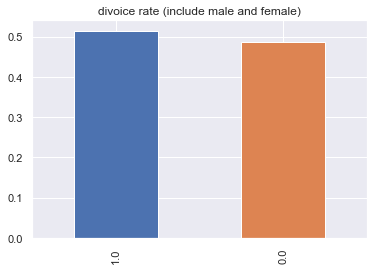

In [481]:
# calculate the divorce rate
(df['divorce'].value_counts()/df['divorce'].notnull().sum()).plot(kind="bar")
plt.title("divoice rate (include male and female)");

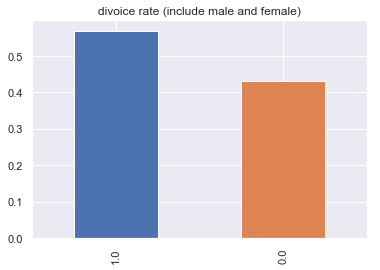

In [482]:
(df_all_drop_1['divorce'].value_counts()/df_all_drop_1['divorce'].notnull().sum()).plot(kind="bar")
plt.title("divoice rate (include male and female)");

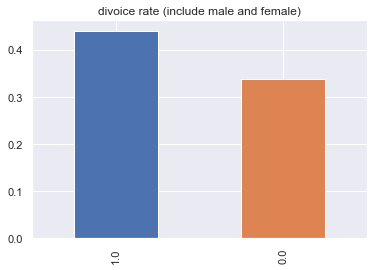

In [486]:
(df_all_drop_1[df_all_drop_1['sex']=='M']['divorce'].value_counts()/df_all_drop_1['divorce'].notnull().sum()).plot(kind="bar")
plt.title("divoice rate (include male and female)");

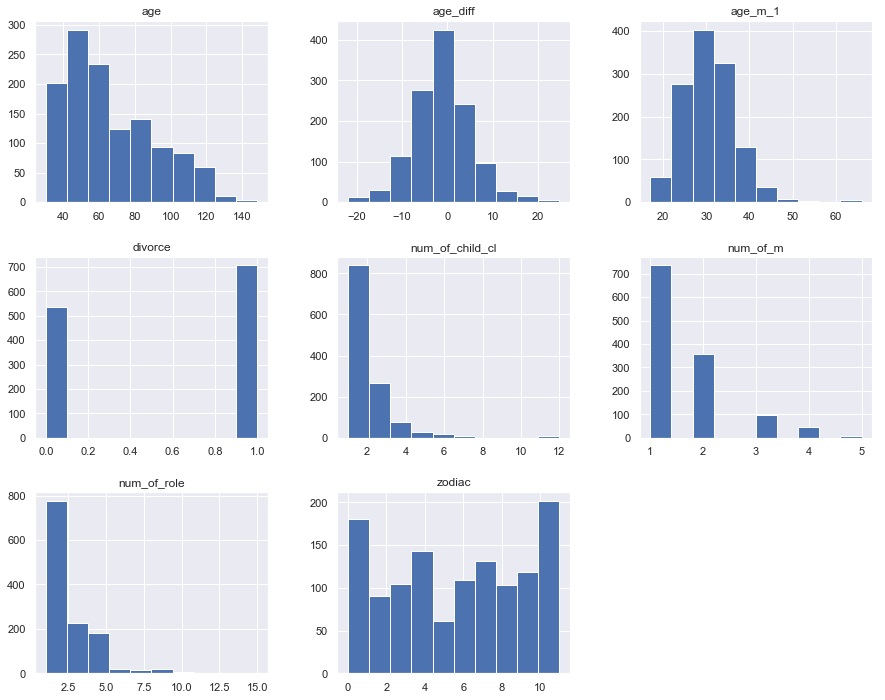

In [480]:
#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
df_all_drop_1.hist(figsize=(15,12));

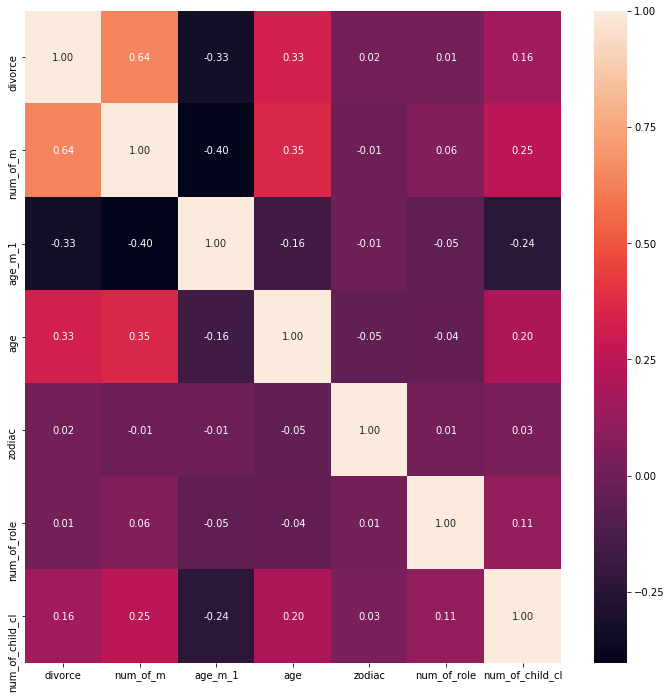

In [452]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(df_all_drop_1.corr(), annot=True, fmt=".2f");

### deal with missing data
Remove the rows associated with nan values in divorce column. Store the dataframe with these rows removed in df_div_rm.

In [428]:
df_div_rm = df.dropna(axis = 0, subset=["divorce"])# dataframe with rows for nan divorce removed
df_div_rm.head()

,name,bday,age_diff,age,age_spouse,year_m,year_div,year_m_sp,year_div_sp,num_of_child_cl,...,geohash,geo_distance,zodiac,zodiac_sp,sex,divorce,age_m_1,age_div_1,age_m_sp_1,age_div_sp_1
2,Willie Aames,1960-07-15,NaN,58.810243,NaN,"[1979, 1986, 2014]",NaN,NaN,NaN,2.0,...,9mupk2n,NaN,6.0,NaN,M,1.0,19.0,NaN,NaN,NaN
5,Bruce Abbott,1954-07-28,-2.165684,64.776142,62.610457,"[1982, 1994]",[1989],"[1982, 1997]","[1989, 1999]",2.0,...,c20fbmg,20000000.0,7.0,9.0,M,1.0,28.0,35.0,26.0,26.0
6,Bud Abbott,NaT,NaN,NaN,NaN,[1918],NaN,NaN,NaN,2.0,...,dr5kgcf,NaN,NaN,NaN,M,0.0,NaN,NaN,NaN,NaN
8,Philip Abbott,NaT,NaN,NaN,NaN,[1950],NaN,NaN,NaN,NaN,...,9z70pmz,NaN,NaN,NaN,M,1.0,NaN,NaN,NaN,NaN
10,Jake Abel,1987-11-18,NaN,31.466765,NaN,[2013],NaN,NaN,NaN,NaN,...,dpq0h5n,NaN,10.0,NaN,M,0.0,26.0,NaN,NaN,NaN


In [471]:
(df_div_rm.isnull().sum()/len(df_div_rm)*100).sort_values()

name                   0.000000
sex                    0.000000
num_of_m               0.000000
divorce                0.000000
year_m                 0.313059
geohash                1.132976
bday                   2.683363
age                    2.683363
zodiac                 2.683363
age_m_1                2.996422
num_of_role            3.905784
num_of_child_cl       33.452594
year_div              58.273703
age_div_1             59.138342
geo_distance          69.692904
age_spouse            70.885510
zodiac_sp             70.885510
num_of_role_sp        71.377460
age_diff              71.407275
num_of_m_sp           74.045915
year_m_sp             74.299344
age_m_sp_1            75.864639
age_div_sp_1          75.864639
num_of_child_sp_cl    79.651163
year_div_sp           85.763268
dtype: float64

In [477]:
df_test=df_div_rm[['name','sex', 'divorce','num_of_m','age_m_1','geohash','age', 'zodiac', 'num_of_role','num_of_child_cl', 'age_diff']]

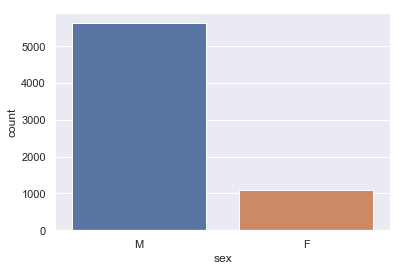

In [478]:
#df_test.shape
#df_test['sex'].hist()
sns.set(style="darkgrid")
ax = sns.countplot(x="sex", data=df_test)

In [479]:
df_all_drop_1  = df_test.dropna()#.dropna()
df_all_drop_1.shape

(1243, 11)

In [487]:
df['geo_distance'].head()

KeyError: 'geo_distance'

# Conclusions and Next Steps
Summarize findings here

In [ ]:
import pandas as pd
df = pd.read_csv('export_df_actress.csv')